<a href="https://colab.research.google.com/github/KonradBier/kBI/blob/master/Case_study_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Załadowanie danych**

---



In [3]:
url = 'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Wstępne przetworzenie danych**

---



In [0]:
tcm = df[df.TotalCharges !=' ']['TotalCharges'].astype('float32').median()

In [6]:
df['TotalCharges'][df['TotalCharges'] == ' '] = tcm
df['TotalCharges'] = df['TotalCharges'].astype('float32')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.TotalCharges.value_counts()

1397.475098    11
20.200001      11
19.750000       9
19.650000       8
20.049999       8
               ..
1588.750000     1
1451.599976     1
1173.349976     1
5589.450195     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
if df.isnull().sum().sum() == 0 :
  print('Nie m braków.')

Nie m braków.


In [0]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'StreamingMovies',
               'PaperlessBilling', 'PaymentMethod', 'Churn']
 
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [0]:
for col in categorical :
  df[col] = pd.Categorical(df[col])

for col in numerical :
  df[col] = df[col].astype('float32')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float32 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [0]:
df = df.drop(columns='customerID')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float32 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [15]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371147,64.761826,2281.915039
std,24.559708,30.089973,2265.270752
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.349998,1397.475098
75%,55.000000,89.849998,3786.599976
max,72.000000,118.750000,8684.799805


In [16]:
df.describe(include='category')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


**Rozkład Churn**

---



No     5174
Yes    1869
Name: Churn, dtype: int64


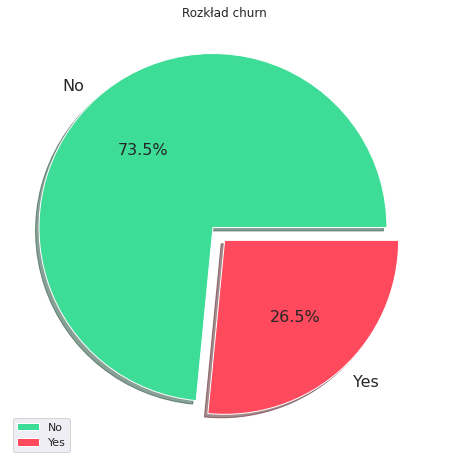

In [34]:
plt.figure(figsize=(10,8))
sns.set()
df.Churn.value_counts().plot(kind='pie', fontsize = 16, colors=['#3DDC97', '#FF495C'], explode=[0.1,0], shadow=True, autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozkład churn')
print(df.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


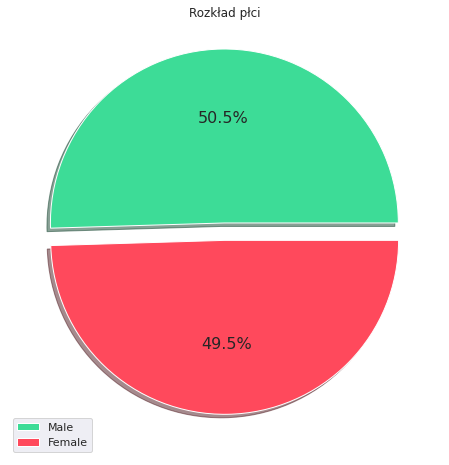

In [41]:
plt.figure(figsize=(10,8))
sns.set()
df.gender.value_counts().plot(kind='pie', labels=['',''], fontsize = 16, colors=['#3DDC97', '#FF495C'], explode=[0.1,0], shadow=True, autopct='%1.1f%%')
plt.legend(['Male', 'Female'])
plt.ylabel('')
plt.title('Rozkład płci')
print(df.gender.value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


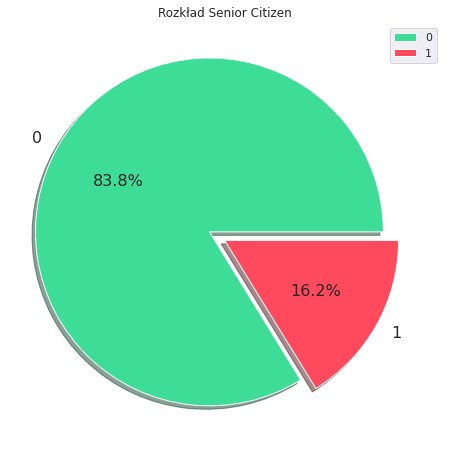

In [42]:
plt.figure(figsize=(10,8))
sns.set()
df.SeniorCitizen.value_counts().plot(kind='pie', fontsize = 16, colors=['#3DDC97', '#FF495C'], explode=[0.1,0], shadow=True, autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozkład Senior Citizen')
print(df.SeniorCitizen.value_counts())

**Rozkłady**

---



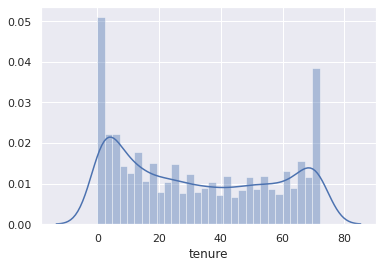

In [45]:
sns.distplot(df.tenure, bins=30)

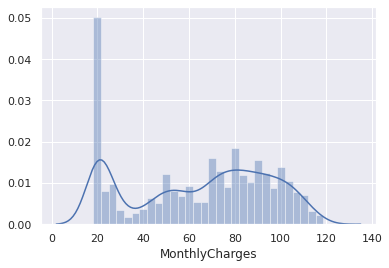

In [46]:
sns.distplot(df.MonthlyCharges, bins=30)

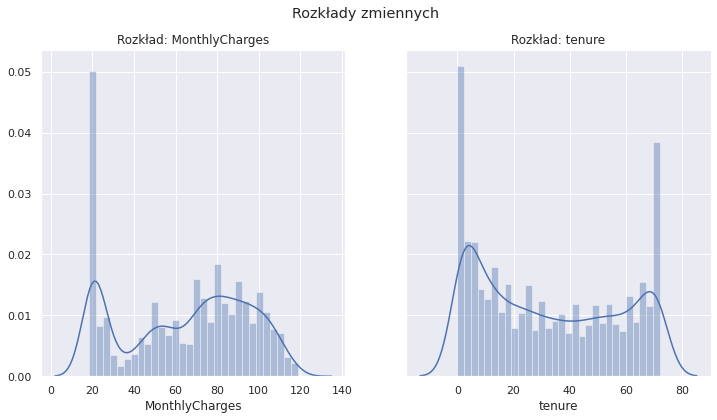

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharey=True, figsize=(12,6))
sns.distplot(df.MonthlyCharges, bins=30, ax=ax[0])
sns.distplot(df.tenure, bins=30, ax=ax[1])

fig.suptitle('Rozkłady zmiennych')
ax[0].title.set_text('Rozkład: MonthlyCharges')
ax[1].title.set_text('Rozkład: tenure')

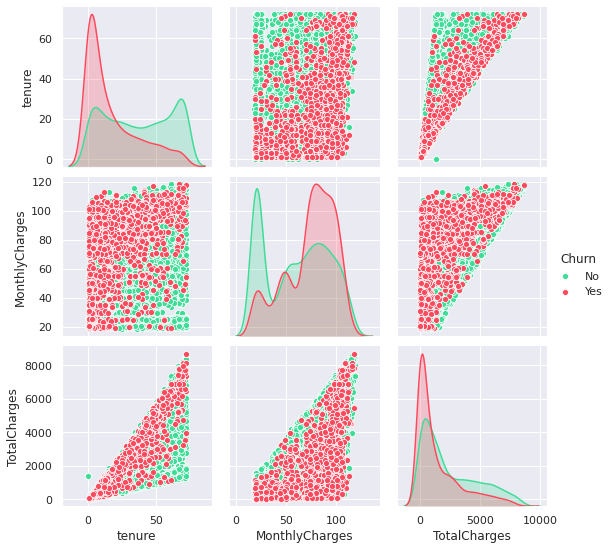

In [58]:
sns.pairplot(data = df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', palette=['#3DDC97', '#FF495C'])

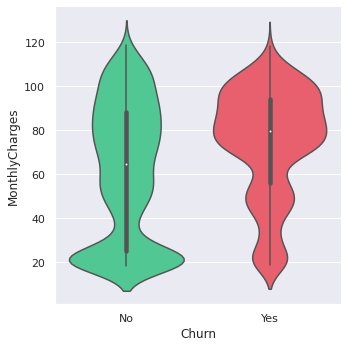

In [62]:
sns.catplot(data=df, x='Churn', y='MonthlyCharges', kind='violin', palette=['#3DDC97', '#FF495C'])

**Macierz korelacji**

---



In [63]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


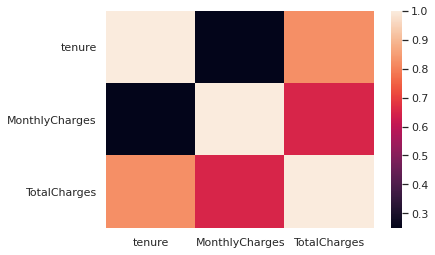

In [64]:
sns.heatmap(df.corr())